# Table of Contents
 <p><div class="lev1 toc-item"><a href="#PEB-Belgrade---Bioconductor-workshop" data-toc-modified-id="PEB-Belgrade---Bioconductor-workshop-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PEB Belgrade - Bioconductor workshop</a></div><div class="lev2 toc-item"><a href="#Requirements" data-toc-modified-id="Requirements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements</a></div><div class="lev2 toc-item"><a href="#Which-libraries-are-we-installing?" data-toc-modified-id="Which-libraries-are-we-installing?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Which libraries are we installing?</a></div><div class="lev1 toc-item"><a href="#The-Annotation-packages-in-Bioconductor" data-toc-modified-id="The-Annotation-packages-in-Bioconductor-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Annotation packages in Bioconductor</a></div><div class="lev1 toc-item"><a href="#The-Homo.sapiens-package" data-toc-modified-id="The-Homo.sapiens-package-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Homo.sapiens package</a></div><div class="lev2 toc-item"><a href="#Gene-symbols-and-IDs:-the-org.Hs.eg.db-package" data-toc-modified-id="Gene-symbols-and-IDs:-the-org.Hs.eg.db-package-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gene symbols and IDs: the org.Hs.eg.db package</a></div><div class="lev3 toc-item"><a href="#Entrez-and-symbols" data-toc-modified-id="Entrez-and-symbols-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Entrez and symbols</a></div><div class="lev4 toc-item"><a href="#Exercise-1:-symbol-and-Ensembl" data-toc-modified-id="Exercise-1:-symbol-and-Ensembl-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Exercise 1: symbol and Ensembl</a></div><div class="lev4 toc-item"><a href="#Exercise-2--Gene-Ontology" data-toc-modified-id="Exercise-2--Gene-Ontology-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>Exercise 2- Gene Ontology</a></div><div class="lev3 toc-item"><a href="#Gene-Ontology-Enrichment-with-DOSE-and-clusterProfiler" data-toc-modified-id="Gene-Ontology-Enrichment-with-DOSE-and-clusterProfiler-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Gene Ontology Enrichment with DOSE and clusterProfiler</a></div><div class="lev2 toc-item"><a href="#Enrichment-using-other-ontologies" data-toc-modified-id="Enrichment-using-other-ontologies-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Enrichment using other ontologies</a></div><div class="lev2 toc-item"><a href="#Getting-gene-coordinates:-the-TxDB-packages" data-toc-modified-id="Getting-gene-coordinates:-the-TxDB-packages-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Getting gene coordinates: the TxDB packages</a></div><div class="lev1 toc-item"><a href="#Calculating-Enrichment" data-toc-modified-id="Calculating-Enrichment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculating Enrichment</a></div><div class="lev1 toc-item"><a href="#Annotation-Hub" data-toc-modified-id="Annotation-Hub-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Annotation Hub</a></div>

# PEB Belgrade - Bioconductor workshop

Giovanni M. Dall'Olio, GlaxoSmithKline. http://bioinfoblog.it

Welcome to the Bioconductor / Data Integration workshop.

This workshop is heavily inspired by the Coursera Bioconductor course. See here for materials: http://kasperdanielhansen.github.io/genbioconductor/


## Requirements

Course materials: http://dalloliogm.github.io

This workshop requires several bioconductor libraries, which take a while to install.

Please start their installation by copying&pasting the commands below. We'll continue the lecture while they get installed:

```
# bioconductor
source("http://bioconductor.org/biocLite.R")
biocLite("Homo.sapiens")
biocLite("rtracklayer")
biocLite("DOSE")
biocLite("clusterProfiler")
biocLite("AnnotationHub")

# dplyr
install.packages(c("dplyr"))

```

# What is Bioconductor?

Bioconductor is the biggest repository of bioinformatics libraries for R. It contains code for dealing with genomic coordinates, calculating differential expression, converting gene symbols and ids, and much more.

To be included a bioconductor, a library must:

- have documentation in the form of a vignette()
- include a battery of tests to make sure that each new version is working
- be citable, using citation() and possibly be described in a bioinformatics journal

## How to get Bioconductor Packages

First, run the following:
```
source("http://bioconductor.org/biocLite.R")
```

At this point you can run the biocLite function to install any package available at http://bioconductor.org/packages/release/BiocViews.html#___Software

For example:
```
biocLite("limma")
```
will install the library limma (a popular library for diff. expression analysis) 

# How to get help on a Bioconductor package

Overview of a package:
```
library(help=Homo.sapiens)
```

Vignettes
```
library(Homo.sapiens)
vignette()
```
Given a function from a Bioconductor package, to which objects can it be applied?

```
showMethods("findOverlaps")
```

# The Annotation packages in Bioconductor

Apart from code function, Bioconductor contains several data packages (https://www.bioconductor.org/packages/release/data/annotation/), containing contain datasets from public sources for multiple organisms.

Some examples:

- **TxDB** objects: coordinates for genes, transcripts, exons...
- **BSGenome**: genome sequences
- **microarray ids** (e.g. hgu133): conversions probe to genes for Affymetrix and Illumina arrays
- **org.\*.eg.db**: gene symbol to id conversion (entrez, ensembl, GO, ..)

In addition two packages allow to access large dataset repositories:

- **biomaRt**: any biomart installation, e.g. ensembl, hgnc, (see http://www.biomart.org/)
- **AnnotationHub**: access to several resources, e.g. any track in the UCSC browser, and more

In this tutorial we will see some of these (TxDB, org.eg.db, AnnotationHub).

## Are Bioconductor Annotation packages up to date?

Most data packages are annotated regularly, with different frequency depending on the data type. Usually 6 months/2 years.

This is a good compromise between reproducibility of analysis, efforts needed to maintain the packages, and getting recent data.

## My species is not present or the data is outdated.

If your species is not present or you need more recent data, you can create a package on your own.

Procedure is well documented and usually require just a table as input.

Easy way to become a Bioconductor developer and good for CV :-)

## Which libraries are we installing?

- **Homo.sapiens**: Wrapper containing several H.sapiens-related packages:
    - **TxDB**: coordinates for genes, transcripts, exons...
    - **org.Hs.eg.db**: Gene symbols
    - **GenomicRanges**: allows to work with gene coordinates
- **rtracklayer**: allows to import BED files and other formats
- **DOSE** and **clusterProfiler**: for ontology enrichment (GO, Disease Ontology, Reactome)
- **AnnotationHub**: allows to download data from UCSC and many other sources

# The Homo.sapiens package

Let's load the Homo.sapiens package. You will see that it will load several other packages:

In [20]:
library(Homo.sapiens)

Bioconductor contains similar wrapper packages for the most common model species (e.g. mouse, rat). For other species, similar data packages may be available, although not organized with a similar wrapper.

## Gene symbols and IDs: the org.Hs.eg.db package

The org.\*.eg.db packages allow to retrieve gene symbols and ids relative to a species (see [list of all packages](https://www.bioconductor.org/packages/release/data/annotation/)). The data is updated every two years, which is a good compromise between reproducibility and getting recent data.

If no org.eg.db package is available for your species, you may consider creating one yourself. You only require a table of genes/symbols, and following a [tutorial](https://www.bioconductor.org/packages/devel/bioc/vignettes/AnnotationForge/inst/doc/SQLForge.pdf)

To see which data is included in the human package, we can open its help page:
```
library(help=org.Hs.eg.db)
```
In alternative, we can use the columns() function:

In [3]:
columns(org.Hs.eg.db)

[1] "ENTREZID"     "PFAM"         "IPI"          "PROSITE"      "ACCNUM"      
 [6] "ALIAS"        "CHR"          "CHRLOC"       "CHRLOCEND"    "ENZYME"      
[11] "MAP"          "PATH"         "PMID"         "REFSEQ"       "SYMBOL"      
[16] "UNIGENE"      "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS" "GENENAME"    
[21] "UNIPROT"      "GO"           "EVIDENCE"     "ONTOLOGY"     "GOALL"       
[26] "EVIDENCEALL"  "ONTOLOGYALL"  "OMIM"         "UCSCKG"

This means that the org.Hs.eg.db package contains mapping between Entrez IDs, PFAM, Prosite, Genenames, GO, etc... for all human genes.



## Visualizing a bimap as a table

The BiMaps in a library can also be accessed as variable. For example, org.Hs.eg.db contains many variables starting with "org.Hs.eg":

In [11]:
ls("package:org.Hs.eg.db")


[1] "org.Hs.eg"                "org.Hs.egACCNUM"         
 [3] "org.Hs.egACCNUM2EG"       "org.Hs.egALIAS2EG"       
 [5] "org.Hs.egCHR"             "org.Hs.egCHRLENGTHS"     
 [7] "org.Hs.egCHRLOC"          "org.Hs.egCHRLOCEND"      
 [9] "org.Hs.eg.db"             "org.Hs.eg_dbconn"        
[11] "org.Hs.eg_dbfile"         "org.Hs.eg_dbInfo"        
[13] "org.Hs.eg_dbschema"       "org.Hs.egENSEMBL"        
[15] "org.Hs.egENSEMBL2EG"      "org.Hs.egENSEMBLPROT"    
[17] "org.Hs.egENSEMBLPROT2EG"  "org.Hs.egENSEMBLTRANS"   
[19] "org.Hs.egENSEMBLTRANS2EG" "org.Hs.egENZYME"         
[21] "org.Hs.egENZYME2EG"       "org.Hs.egGENENAME"       
[23] "org.Hs.egGO"              "org.Hs.egGO2ALLEGS"      
[25] "org.Hs.egGO2EG"           "org.Hs.egMAP"            
[27] "org.Hs.egMAP2EG"          "org.Hs.egMAPCOUNTS"      
[29] "org.Hs.egOMIM"            "org.Hs.egOMIM2EG"        
[31] "org.Hs.egORGANISM"        "org.Hs.egPATH"           
[33] "org.Hs.egPATH2EG"         "org.Hs.egPFAM"           
[35] "org.Hs.egPMID"            "org.Hs.egPMID2EG"        
[37] "org.Hs.egPROSITE"         "org.Hs.egREFSEQ"         
[39] "org.Hs.egREFSEQ2EG"       "org.Hs.egSYMBOL"         
[41] "org.Hs.egSYMBOL2EG"       "org.Hs.egUCSCKG"         
[43] "org.Hs.egUNIGENE"         "org.Hs.egUNIGENE2EG"     
[45] "org.Hs.egUNIPROT"

These can be converted to table using as.data.frame or toTable. For example the following gets a dataframe of all KEGG pathways to Entrez:

In [9]:
head(toTable(org.Hs.egPATH2EG))

gene_id,path_id
2,04610
9,00232
9,00983
9,01100
10,00232
10,00983


To get the name and description of these KEGG pathways, we would have to load the KEGG.db data package.

### Entrez and symbols

The select() function from AnnotationDbi allows to access all the IDs and Symbols in the org.db object.

For example, here is how to get entrez and description of genes MGAT2 and MGAT3:

In [8]:
AnnotationDbi::select(org.Hs.eg.db, keys=as.character(c("MGAT2", "MGAT3")), keytype='SYMBOL', columns=c('ENTREZID','GENENAME'))

SYMBOL,ENTREZID,GENENAME
MGAT2,4247,"mannosyl (alpha-1,6-)-glycoprotein beta-1,2-N-acetylglucosaminyltransferase"
MGAT3,4248,"mannosyl (beta-1,4-)-glycoprotein beta-1,4-N-acetylglucosaminyltransferase"


The "keys" argument defines the symbols that we want to search. The "keytype" and "columns" define the type of input and output. Use the functions keytypes(org.Hs.eg.db) and columns(org.Hs.eg.db) to see which values are supported. 

#### Exercise 1: symbol and Ensembl

What is the name and the Ensembl ID of the gene with Entrez ID 1234? 

In [9]:
AnnotationDbi::select(org.Hs.eg.db, keys=as.character(c("1234")), keytype='ENTREZID', columns=c('SYMBOL','ENSEMBL'))

ENTREZID,SYMBOL,ENSEMBL
1234,CCR5,ENSG00000160791


#### Exercise 2- Gene Ontology

The Gene Ontology database annotates terms related to the biological process, molecular function, and cellular compartment for every gene.

Can you get all the Gene Ontology (GO) terms associated to PTEN?

In [5]:
head(select(org.Hs.eg.db, keys='PTEN', keytype='SYMBOL', columns='GO'))

SYMBOL,GO,EVIDENCE,ONTOLOGY
PTEN,GO:0000079,TAS,BP
PTEN,GO:0000287,IEA,MF
PTEN,GO:0001525,IEA,BP
PTEN,GO:0001933,IDA,BP
PTEN,GO:0002902,IEA,BP
PTEN,GO:0004438,IDA,MF


To get the definition of these GO ids, we can use the GO.db database:

In [6]:
PTEN.go = select(org.Hs.eg.db, keys='PTEN', keytype='SYMBOL', columns='GO')
PTEN.go$TERM = AnnotationDbi::select(GO.db, keys=as.character(PTEN.go$GO), columns="TERM")$TERM
head(PTEN.go)

SYMBOL,GO,EVIDENCE,ONTOLOGY,TERM
PTEN,GO:0000079,TAS,BP,regulation of cyclin-dependent protein serine/threonine kinase activity
PTEN,GO:0000287,IEA,MF,magnesium ion binding
PTEN,GO:0001525,IEA,BP,angiogenesis
PTEN,GO:0001933,IDA,BP,negative regulation of protein phosphorylation
PTEN,GO:0002902,IEA,BP,regulation of B cell apoptotic process
PTEN,GO:0004438,IDA,MF,phosphatidylinositol-3-phosphatase activity


### Gene Ontology Enrichment with DOSE and clusterProfiler

When we have a long list of genes, listing all the Gene Ontology terms associated to each gene produces a very verbose output, which is difficult to use.

It is more useful to do an Ontology Enrichment analysis, to see which are the most represented terms in the list.

There are several functions to do enrichment analysis in BiocConductor, but today we will use the enrichGO function from clusterProfiler:

In [14]:
library(clusterProfiler)
library(DOSE)

mygenes = c(23450, 5160, 7126, 27118, 8452, 3675, 6624, 3638, 9918, 123, 213, 3383,1869,890,1871,9134,9928,1029,3479,6573,3757,332)
print(mygenes[1:10])



Attaching package: ‘clusterProfiler’

The following object is masked from ‘package:DOSE’:

    cnetplot



 [1] 23450  5160  7126 27118  8452  3675  6624  3638  9918   123


In [40]:
# Let's calculate the enrichment
myenrich = enrichGO(mygenes, "human", ont="MF", readable=F)
head(summary(myenrich))


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
GO:0019899,GO:0019899,enzyme binding,9/20,1481/18585,9.460737e-06,0.001712393,0.001145247,1029/213/332/3675/3757/7126/8452/890/9928,9
GO:0005178,GO:0005178,integrin binding,3/20,104/18585,1.810737e-04,0.009349881,0.006253192,3383/3479/3675,3
GO:0032403,GO:0032403,protein complex binding,6/20,852/18585,2.032337e-04,0.009349881,0.006253192,332/3383/3479/3675/6624/9928,6
GO:0016538,GO:0016538,cyclin-dependent protein serine/threonine kinase regulator activity,2/20,20/18585,2.066272e-04,0.009349881,0.006253192,1029/9134,2
GO:0019904,GO:0019904,protein domain specific binding,5/20,588/18585,3.255709e-04,0.011785666,0.007882242,3675/3757/7126/8452/9928,5
GO:0050839,GO:0050839,cell adhesion molecule binding,3/20,171/18585,7.775958e-04,0.023457474,0.015688337,3383/3479/3675,3


Behind the lines, enrichGO retrieves the GO annotations from the org.Hs.eg.db package, and calculates the enrichment.

The output can be plot in several ways. For example as a graph, using cnetplot:

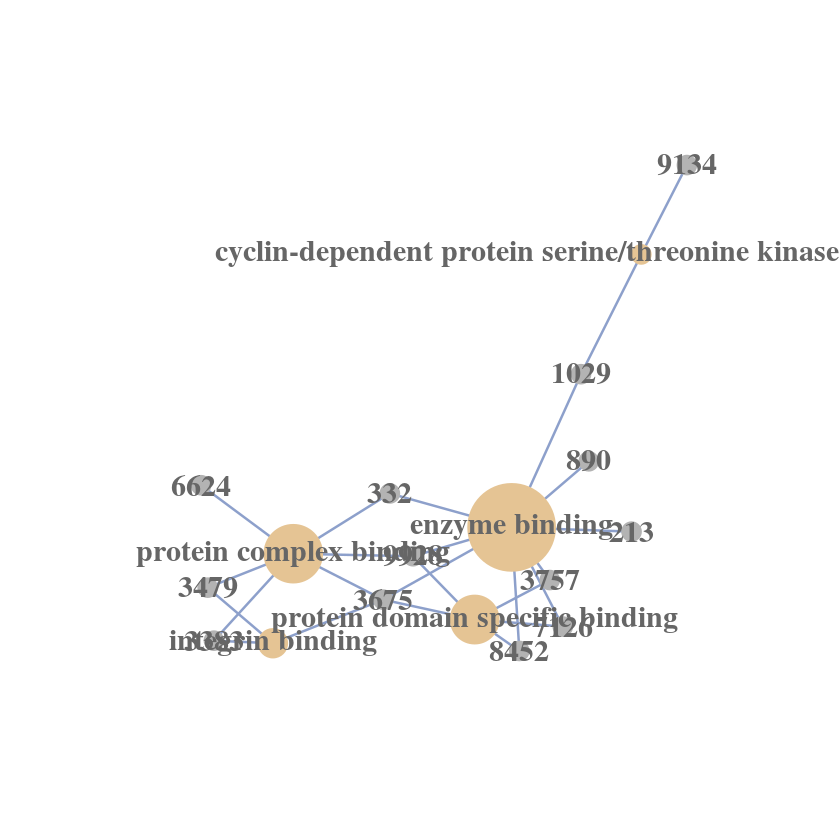

In [41]:
cnetplot(myenrich)

## Enrichment using other ontologies

We can also do an enrichment using other ontologies.

### What is an Ontology?

An ontology is a controlled dictionary for a category of terms. They allow to avoid ambigueties and misunderstandings, by defining the standard name of a term (e.g. epilepsy) and annotating all the possible synonyms (e.g. epilepsy syndrome)

In bioinformatics the most famous ontology is GO, but there are many others. For example MeSH annotates medical terms, and Disease Ontology (subset of MeSH) annotates disease names.

Since Disease Ontology provides mappings between Disease Terms and genes associated to them, we can calculate an enrichment of disease terms:

In [15]:
library(DOSE)
myenrich.do = enrichDO(mygenes)
head(summary(myenrich.do))

Loading required package: DO.db


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
DOID:0060116,DOID:0060116,sensory system cancer,11/18,139/8018,8.183720e-16,2.168686e-13,8.011431e-14,3383/1869/890/1871/9134/9928/1029/3479/6573/3757/332,11
DOID:2174,DOID:2174,ocular cancer,11/18,139/8018,8.183720e-16,2.168686e-13,8.011431e-14,3383/1869/890/1871/9134/9928/1029/3479/6573/3757/332,11
DOID:768,DOID:768,retinoblastoma,10/18,116/8018,1.076659e-14,1.360963e-12,5.027589e-13,1869/890/1871/9134/9928/1029/3479/6573/3757/332,10
DOID:771,DOID:771,retinal cell cancer,10/18,116/8018,1.076659e-14,1.360963e-12,5.027589e-13,1869/890/1871/9134/9928/1029/3479/6573/3757/332,10
DOID:4645,DOID:4645,retinal cancer,10/18,118/8018,1.283927e-14,1.360963e-12,5.027589e-13,1869/890/1871/9134/9928/1029/3479/6573/3757/332,10
DOID:5679,DOID:5679,retinal disease,12/18,455/8018,1.316791e-11,1.163165e-09,4.296896e-10,123/3383/1869/890/1871/9134/9928/1029/3479/6573/3757/332,12


Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in data.matrix(x):
“NAs introduced by coercion”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'xlim' values


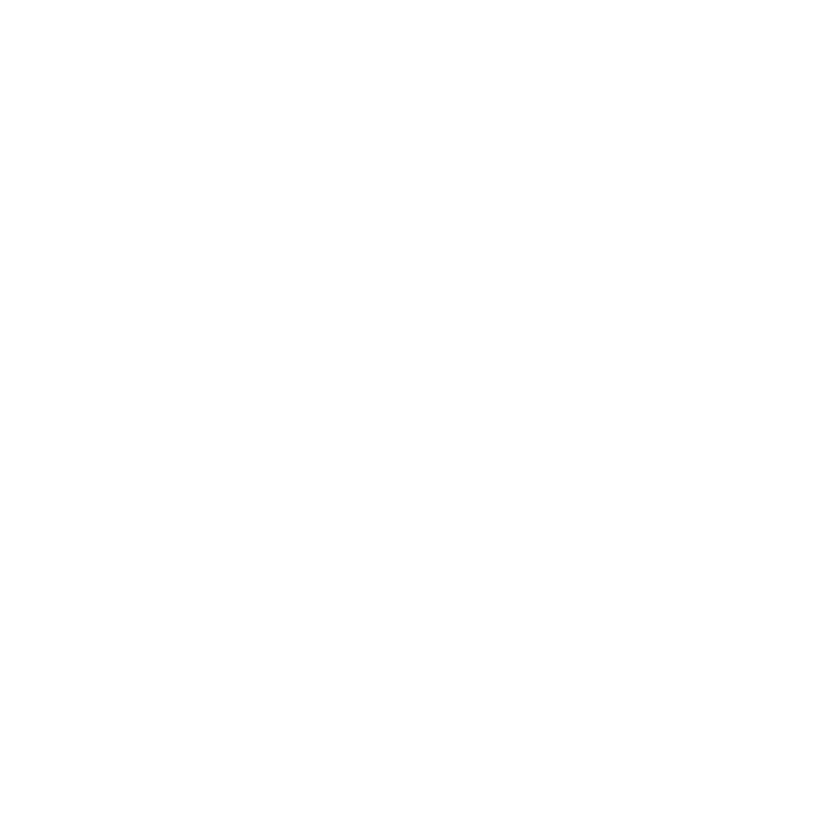

In [18]:
plot(summary(myenrich.do))


## Getting gene coordinates: the TxDB packages

Another package loaded with Homo.sapiens is the TxDb.Hsapiens.UCSC.hg19.knownGene.

This contains coordinates of genes, transcripts and exons in the human genome.

We can get the gene coordinates using the genes() function:

In [19]:
genes(TxDb.Hsapiens.UCSC.hg19.knownGene)

GRanges object with 23056 ranges and 1 metadata column:
        seqnames                 ranges strand   |     gene_id
           <Rle>              <IRanges>  <Rle>   | <character>
      1    chr19 [ 58858172,  58874214]      -   |           1
     10     chr8 [ 18248755,  18258723]      +   |          10
    100    chr20 [ 43248163,  43280376]      -   |         100
   1000    chr18 [ 25530930,  25757445]      -   |        1000
  10000     chr1 [243651535, 244006886]      -   |       10000
    ...      ...                    ...    ... ...         ...
   9991     chr9 [114979995, 115095944]      -   |        9991
   9992    chr21 [ 35736323,  35743440]      +   |        9992
   9993    chr22 [ 19023795,  19109967]      -   |        9993
   9994     chr6 [ 90539619,  90584155]      +   |        9994
   9997    chr22 [ 50961997,  50964905]      -   |        9997
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

### Getting promoters, cds, transcripts and exons

Apart from genes, we can extract coordinates of transcripts(), exons(), cds(), and promoters(), using the correspondant function.

The output of these functions can be customized to include additional columns, e.g. you may want to print both the exon and gene id:

In [34]:
exons(TxDb.Hsapiens.UCSC.hg19.knownGene)

GRanges object with 289969 ranges and 1 metadata column:
           seqnames               ranges strand   |   exon_id
              <Rle>            <IRanges>  <Rle>   | <integer>
       [1]     chr1       [11874, 12227]      +   |         1
       [2]     chr1       [12595, 12721]      +   |         2
       [3]     chr1       [12613, 12721]      +   |         3
       [4]     chr1       [12646, 12697]      +   |         4
       [5]     chr1       [13221, 14409]      +   |         5
       ...      ...                  ...    ... ...       ...
  [289965]     chrY [27607404, 27607432]      -   |    277746
  [289966]     chrY [27635919, 27635954]      -   |    277747
  [289967]     chrY [59358329, 59359508]      -   |    277748
  [289968]     chrY [59360007, 59360115]      -   |    277749
  [289969]     chrY [59360501, 59360854]      -   |    277750
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

In [37]:
exons(TxDb.Hsapiens.UCSC.hg19.knownGene, columns=c("exon_id", "gene_id"))

GRanges object with 289969 ranges and 2 metadata columns:
           seqnames               ranges strand   |   exon_id         gene_id
              <Rle>            <IRanges>  <Rle>   | <integer> <CharacterList>
       [1]     chr1       [11874, 12227]      +   |         1       100287102
       [2]     chr1       [12595, 12721]      +   |         2       100287102
       [3]     chr1       [12613, 12721]      +   |         3       100287102
       [4]     chr1       [12646, 12697]      +   |         4       100287102
       [5]     chr1       [13221, 14409]      +   |         5       100287102
       ...      ...                  ...    ... ...       ...             ...
  [289965]     chrY [27607404, 27607432]      -   |    277746              NA
  [289966]     chrY [27635919, 27635954]      -   |    277747              NA
  [289967]     chrY [59358329, 59359508]      -   |    277748              NA
  [289968]     chrY [59360007, 59360115]      -   |    277749              NA
  [289

To get the list of all possible additional columns, we can use the columns() function as for the org.Hs.eg.db package:

In [33]:
columns(TxDb.Hsapiens.UCSC.hg19.knownGene)


[1] "CDSID"      "CDSNAME"    "CDSCHROM"   "CDSSTRAND"  "CDSSTART"  
 [6] "CDSEND"     "EXONID"     "EXONNAME"   "EXONCHROM"  "EXONSTRAND"
[11] "EXONSTART"  "EXONEND"    "GENEID"     "TXID"       "EXONRANK"  
[16] "TXNAME"     "TXTYPE"     "TXCHROM"    "TXSTRAND"   "TXSTART"   
[21] "TXEND"

### Subsetting a GenomicRanges object

GenomicRanges object can be subsetted like normal data frames, using the subset function.

Chromosome names must be referred as "seqnames":

In [31]:
subset(exons(TxDb.Hsapiens.UCSC.hg19.knownGene), 
       seqnames=="chr6" & start>10000000 & end<20000000)

GRanges object with 569 ranges and 1 metadata column:
        seqnames               ranges strand   |   exon_id
           <Rle>            <IRanges>  <Rle>   | <integer>
    [1]     chr6 [10412551, 10412600]      +   |     86074
    [2]     chr6 [10414300, 10415284]      +   |     86075
    [3]     chr6 [10414914, 10415284]      +   |     86076
    [4]     chr6 [10415520, 10415613]      +   |     86077
    [5]     chr6 [10415520, 10416402]      +   |     86078
    ...      ...                  ...    ... ...       ...
  [565]     chr6 [19180383, 19180711]      -   |     93064
  [566]     chr6 [19642656, 19642760]      -   |     93065
  [567]     chr6 [19802395, 19804141]      -   |     93066
  [568]     chr6 [19804402, 19804508]      -   |     93067
  [569]     chr6 [19804906, 19804981]      -   |     93068
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

# Importing a BED file

BED and other formats (GFF, bigwig, etc..) can be imported using the import() function from rtracklayer.


# Annotation Hub

In [38]:
library(AnnotationHub)
ahub = AnnotationHub()
ahub



Attaching package: ‘AnnotationHub’

The following object is masked from ‘package:Biobase’:

    cache



AnnotationHub with 35306 records
# snapshotDate(): 2016-08-15 
# $dataprovider: BroadInstitute, UCSC, Ensembl, NCBI, Haemcode, Inparanoid8,...
# $species: Homo sapiens, Mus musculus, Bos taurus, Pan troglodytes, Danio r...
# $rdataclass: GRanges, FaFile, BigWigFile, OrgDb, ChainFile, Inparanoid8Db,...
# additional mcols(): taxonomyid, genome, description, tags, sourceurl,
#   sourcetype 
# retrieve records with, e.g., 'object[["AH2"]]' 

            title                                               
  AH2     | Ailuropoda_melanoleuca.ailMel1.69.dna.toplevel.fa   
  AH3     | Ailuropoda_melanoleuca.ailMel1.69.dna_rm.toplevel.fa
  AH4     | Ailuropoda_melanoleuca.ailMel1.69.dna_sm.toplevel.fa
  AH5     | Ailuropoda_melanoleuca.ailMel1.69.ncrna.fa          
  AH6     | Ailuropoda_melanoleuca.ailMel1.69.pep.all.fa        
  ...       ...                                                 
  AH49436 | Xiphophorus_maculatus.Xipmac4.4.2.dna_rm.toplevel.fa
  AH49437 | Xiphophorus_maculatus.Xipm